[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Lamb_et_al_2017/fig_4.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Lamb_et_al_2017/fig_4.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Lamb_et_al_2017/fig_4.ipynb)

#### based on Fig. 4 from Lamb et al. 2017 (PNAS)  "_Laboratory measurements of HDO/H2O isotopic fractionation during ice deposition in simulated cirrus clouds_"
https://doi.org/10.1073/pnas.1618374114

In [1]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [2]:
from open_atmos_jupyter_utils import show_plot
from PySDM import Formulae
from PySDM.physics import constants_defaults
from matplotlib import pyplot
import numpy as np

In [3]:
PAPERS = {
    'MerlivatAndNief1967': 'red',
    'EllehojEtAl2013': 'blue',
    'LambEtAl2017': 'black',
}

T = np.linspace(180, constants_defaults.T0)
alphas = {
    paper: Formulae(
        isotope_equilibrium_fractionation_factors=paper
    ).isotope_equilibrium_fractionation_factors.alpha_i_2H(T)
    for paper in PAPERS
}

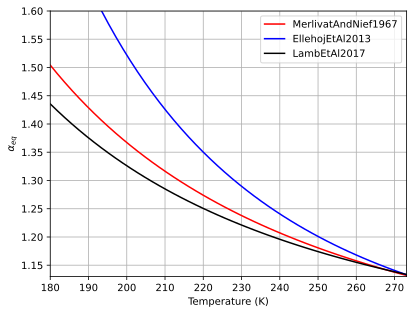

In [4]:
for label, alpha in alphas.items():
    pyplot.plot(T, alpha, label=label, color=PAPERS[label])
pyplot.grid()
pyplot.legend()
pyplot.xlabel('Temperature (K)')
pyplot.xlim(T[0], T[-1])
pyplot.xticks(np.linspace(180, 270, 10))
pyplot.ylabel('$α_{eq}$')
pyplot.ylim(1.13, 1.6)
pyplot.yticks(np.linspace(1.15, 1.6, 10))
show_plot('fig_4.pdf')